# Final Exam

In [69]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = sns.load_dataset('mpg')

## Information on the data set (Q2-Q3)

In [16]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevroletchevellemalibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buickskylark
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouthsatellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amcrebelsst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,fordtorino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Working with the brand colum (Q4-Q8)

In [29]:
#Q4
df['brand'] = df.apply(lambda x: str(x['name']).split(' ')[0], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [31]:
#Q5
df = df.drop('name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


In [39]:
#Q6
df.brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [42]:
#Q7
df['brand'] = df.brand.replace(['chevy', 'toyouta','maxda','chevroelt','vw','mercedes','vokswagen'],
                               ['chevrolet','toyota','mazda','chevrolet', 'volkswagen', 'mercedes-benz','volkswagen'])
df.brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes-benz', 'cadillac', 'triumph', 'nissan'],
      dtype=object)

In [45]:
#Q8
df =df.dropna()

## Getting the dummy variables (Q9-Q11)

In [48]:
#Q9
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
dummy_df = pd.get_dummies(df[cat_cols])

In [50]:
#Q10
df.drop(cat_cols, axis=1, inplace=True)
dataDummies = df.join(dummy_df)
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mpg                  392 non-null    float64
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   model_year           392 non-null    int64  
 7   origin_europe        392 non-null    bool   
 8   origin_japan         392 non-null    bool   
 9   origin_usa           392 non-null    bool   
 10  brand_amc            392 non-null    bool   
 11  brand_audi           392 non-null    bool   
 12  brand_bmw            392 non-null    bool   
 13  brand_buick          392 non-null    bool   
 14  brand_cadillac       392 non-null    bool   
 15  brand_capri          392 non-null    bool   


In [54]:
#Q11
num_cols = dataDummies.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
dataDummies[num_cols] = scaler.fit_transform(dataDummies[num_cols])
dataDummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Regression (Q12-Q15)

In [60]:
#Q12
dataDummies.corr().mpg.sort_values(ascending=True)

weight                -0.832244
displacement          -0.805127
horsepower            -0.778427
cylinders             -0.777618
origin_usa            -0.565161
brand_ford            -0.190289
brand_amc             -0.187560
brand_chevrolet       -0.152788
brand_buick           -0.116456
brand_chrysler        -0.098832
brand_mercury         -0.094336
brand_hi              -0.093721
brand_pontiac         -0.090860
brand_plymouth        -0.065513
brand_dodge           -0.049286
brand_oldsmobile      -0.048693
brand_volvo           -0.037255
brand_cadillac        -0.033954
brand_bmw              0.002794
brand_peugeot          0.004473
brand_mercedes-benz    0.005867
brand_saab             0.005915
brand_capri            0.010082
brand_opel             0.030012
brand_audi             0.056537
brand_renault          0.070083
brand_triumph          0.074960
brand_nissan           0.081448
brand_subaru           0.092209
brand_fiat             0.101222
brand_mazda            0.150744
brand_to

In [61]:
# The variable with the highest correlation to mpg is weight followed by displacement. These both have |r| of over 0.8 showing
# these two variables have the strongest correlations. Other variables with strong to somewhat strong correlations to 
# note are: horsepower, cylinders, origin_us and model_year

In [63]:
#Q13
x= dataDummies.drop('mpg', axis=1)  
y = dataDummies['mpg']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [88]:
#Q14
max_features = len(x.columns)
mse_scores = []
train_scores = []
test_scores = []

for n_features in range(1, max_features + 1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe, y_train)
    y_pred = model.predict(x_test_rfe)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    train_scores.append(model.score(x_train_rfe, y_train))
    test_scores.append(model.score(x_test_rfe, y_test))


Text(0, 0.5, 'R^2 Score')

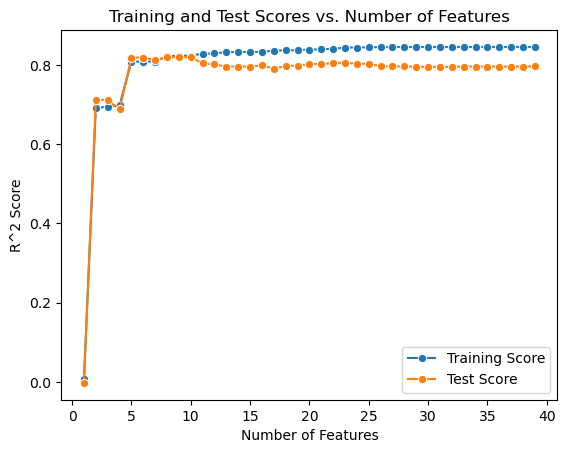

In [94]:
#Q15
plt = sns.lineplot(x=range(1, max_features + 1), y=train_scores, marker='o', label='Training Score')
plt = sns.lineplot(x=range(1, max_features + 1), y=test_scores, marker='o', label='Test Score')
plt.set_title('Training and Test Scores vs. Number of Features')
plt.set_xlabel('Number of Features')
plt.set_ylabel('R^2 Score')

In [90]:
    # The intial r^2 is rather small showing the model is not very good with only one parameter. But after a 
# second parameter is introduced the r^2 drastically improves. However what is surprising is that after an addition of two more 
# variables the r^2 gets slightly worse. This shows that the 3rd and 4th variables do not help the model. Then 5th variable the 
# causes another rise which in the r^2  which in turn strengthens our model. The rest of the variables have a very 
# negligible effect on the r^2. However we can see that the test and train scores have divereged when the test scores has 
# 10 features. This means our model is not performing  as well when the taking into account the remain features. However 
# the r^2 is still high so overall the model is performing well. 